In [0]:
from __future__ import absolute_import,division,print_function,unicode_literals

In [0]:
import tensorflow_datasets as tfds
import tensorflow as tf


In [4]:
## Get the data
dataset,info=tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset,test_dataset=dataset['train'],dataset['test']

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteR714CT/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteR714CT/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteR714CT/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [0]:
toeknizer=info.features['text'].encoder

BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [0]:
model=tf.keras.Sequential([
      tf.keras.layers.Embedding(toeknizer.vocab_size,64),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
      tf.keras.layers.Dense(64,activation='relu'),
      tf.keras.layers.Dense(1,activation='sigmoid')
])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [9]:
NUM_EPOCHS=5
history=model.fit(train_dataset,epochs=NUM_EPOCHS,validation_data=test_dataset)

Epoch 1/5
391/391 [==============================] - 71s 181ms/step - loss: 0.6266 - accuracy: 0.6449 - val_loss: 0.5016 - val_accuracy: 0.7702
Epoch 2/5
391/391 [==============================] - 69s 177ms/step - loss: 0.4286 - accuracy: 0.8124 - val_loss: 0.4508 - val_accuracy: 0.7952
Epoch 3/5
391/391 [==============================] - 69s 176ms/step - loss: 0.3354 - accuracy: 0.8623 - val_loss: 0.5308 - val_accuracy: 0.7361
Epoch 4/5
391/391 [==============================] - 68s 174ms/step - loss: 0.4613 - accuracy: 0.7894 - val_loss: 0.4987 - val_accuracy: 0.7840
Epoch 5/5
391/391 [==============================] - 68s 175ms/step - loss: 0.2890 - accuracy: 0.8886 - val_loss: 0.4316 - val_accuracy: 0.8196


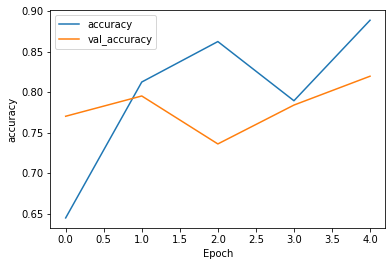

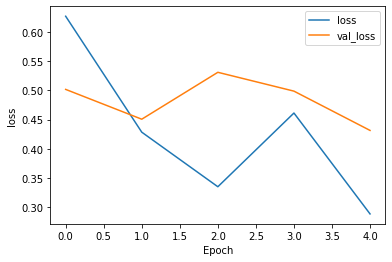

In [13]:
import matplotlib.pyplot as plt

def plot_graphs(history,string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_' + string])
  plt.xlabel("Epoch")
  plt.ylabel(string)
  plt.legend([string,'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

MultiLayer LSTM

In [0]:
model=tf.keras.Sequential([
      tf.keras.layers.Embedding(toeknizer.vocab_size,64),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,return_sequences=True)),
      tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
      tf.keras.layers.Dense(64,activation='relu'),
      tf.keras.layers.Dense(1,activation='sigmoid')
])

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_1 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
bidirectional_2 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 635,329
Trainable params: 635,329
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [19]:
NUM_EPOCHS = 5
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/5
391/391 [==============================] - 137s 350ms/step - loss: 0.5265 - accuracy: 0.7317 - val_loss: 0.5371 - val_accuracy: 0.7425
Epoch 2/5
391/391 [==============================] - 135s 346ms/step - loss: 0.3498 - accuracy: 0.8586 - val_loss: 0.4648 - val_accuracy: 0.8329
Epoch 3/5
391/391 [==============================] - 134s 343ms/step - loss: 0.2802 - accuracy: 0.8937 - val_loss: 0.4289 - val_accuracy: 0.8439
Epoch 4/5
391/391 [==============================] - 134s 343ms/step - loss: 0.2106 - accuracy: 0.9218 - val_loss: 0.4515 - val_accuracy: 0.8313
Epoch 5/5
391/391 [==============================] - 134s 343ms/step - loss: 0.2252 - accuracy: 0.9173 - val_loss: 0.4417 - val_accuracy: 0.8136


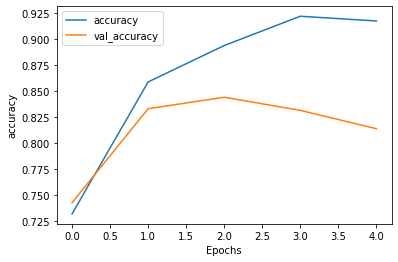

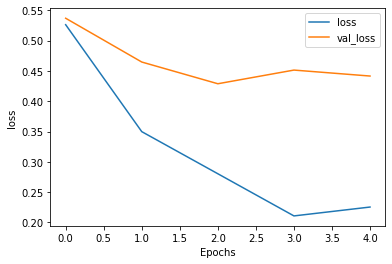

In [21]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

Multiple Layer GRU

In [0]:
model=tf.keras.Sequential([
      tf.keras.layers.Embedding(toeknizer.vocab_size,64),
      tf.keras.layers.Conv1D(128,5,activation='relu'),
      tf.keras.layers.GlobalAveragePooling1D(),
      tf.keras.layers.Dense(64,activation='relu'),
      tf.keras.layers.Dense(1,activation='sigmoid')
])

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
conv1d_2 (Conv1D)            (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [27]:
NUM_EPOCHS=5
history=model.fit(train_dataset,epochs=NUM_EPOCHS,validation_data=test_dataset)

Epoch 1/5
391/391 [==============================] - 31s 80ms/step - loss: 0.4371 - accuracy: 0.7844 - val_loss: 0.3092 - val_accuracy: 0.8750
Epoch 2/5
391/391 [==============================] - 21s 54ms/step - loss: 0.2202 - accuracy: 0.9174 - val_loss: 0.3065 - val_accuracy: 0.8742
Epoch 3/5
391/391 [==============================] - 19s 48ms/step - loss: 0.1678 - accuracy: 0.9388 - val_loss: 0.3446 - val_accuracy: 0.8650
Epoch 4/5
391/391 [==============================] - 18s 47ms/step - loss: 0.1359 - accuracy: 0.9518 - val_loss: 0.3831 - val_accuracy: 0.8679
Epoch 5/5
391/391 [==============================] - 18s 46ms/step - loss: 0.1096 - accuracy: 0.9628 - val_loss: 0.4470 - val_accuracy: 0.8588


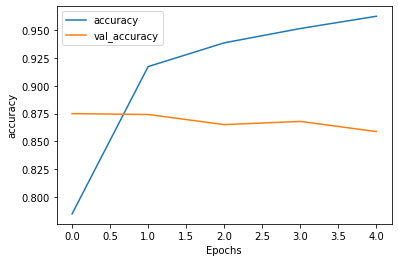

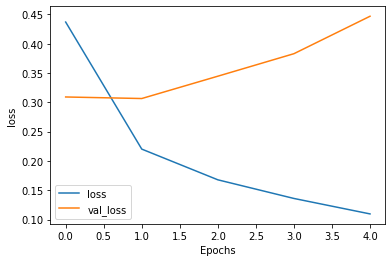

In [28]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')